## 1. Downloading and Reading data

### 1.1 Download from Drive and unzip

In [ ]:
!mkdir digit-recognizer
!unzip drive/MyDrive/digit-recognizer.zip -d digit-recognizer

mkdir: cannot create directory ‘digit-recognizer’: File exists
Archive:  drive/MyDrive/digit-recognizer.zip
replace digit-recognizer/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### 1.2 Read train and test dataframes

In [ ]:
import pandas as pd

train_df = pd.read_csv('digit-recognizer/train.csv')

train_df[:5]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df = pd.read_csv('digit-recognizer/test.csv')

test_df[:5]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Make X and y datasets

### 2.1 Put labels and image data into dataset

In [ ]:
print(train_df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [ ]:
X = train_df.drop(columns=['label'])
y = train_df['label']
X_res = test_df

### 2.2 Normalize X datasets

In [ ]:
X /= 255.
X_res /= 255.
print(X.head())
print(X_res.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0   

### 2.3 Reshape X datasets
The Pictures are 784 pixels total which is 28*28.
Reshape X_train and X_test to 28x28

In [ ]:
X = X.values.reshape(-1, 28, 28, 1)
X_res = X_res.values.reshape(-1, 28, 28, 1)
X.shape, X_res.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

### 2.4 One hot encode y
There are 10 different digits, so the number of classes will be 10

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes = 10)

## 3. Visualize data

### 3.1 Plot random images with labels

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

def plot_n_random_images(n=5):

  """
  Plots n random images with labels as titles
  """

  fig = plt.figure(figsize=(10, 7))

  for i in range(1,n+1):
    rand_id = random.randint(0, 4200-1)

    img = X[rand_id][:, :, 0]
    label = y[rand_id]

    fig.add_subplot(1,5,i)
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Answer: {np.where(y_ds[rand_id] == 1)[0]}")

  plt.show()

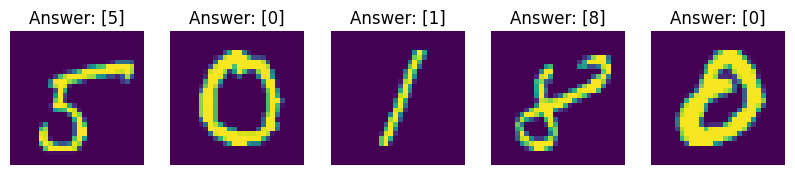

In [ ]:
plot_n_random_images()

## 4. Preprocess Images

### 4.1 Create Augmentation Datagen

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=15, # shouldn't be too high because it could change a number
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1)

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    datagen.fit(X_train)
    train_data = datagen.flow(X_train, y_train, batch_size=64)
    test_data = (X_test, y_test)

    model_3.fit(train_data,
                  epochs=50,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=len(test_data),
                  callbacks=[reduce_lr, early_stopping])

   # y_pred = model_3.predict(X_test)
    #y_pred = tf.argmax(y_pred, axis=1)
    #y_test = tf.constant(y_test)


Epoch 1/50
525/525 [==============================] - 18s 27ms/step - loss: 0.2956 - accuracy: 0.9059 - val_loss: 0.0915 - val_accuracy: 0.9738 - lr: 0.0010
Epoch 2/50
525/525 [==============================] - 14s 26ms/step - loss: 0.1060 - accuracy: 0.9661 - val_loss: 0.0377 - val_accuracy: 0.9881 - lr: 0.0010
Epoch 3/50
525/525 [==============================] - 14s 26ms/step - loss: 0.0862 - accuracy: 0.9746 - val_loss: 0.0450 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 4/50
525/525 [==============================] - 14s 26ms/step - loss: 0.0700 - accuracy: 0.9798 - val_loss: 0.0315 - val_accuracy: 0.9900 - lr: 0.0010
Epoch 5/50
525/525 [==============================] - 14s 26ms/step - loss: 0.0623 - accuracy: 0.9811 - val_loss: 0.0281 - val_accuracy: 0.9911 - lr: 0.0010
Epoch 6/50
525/525 [==============================] - 14s 26ms/step - loss: 0.0597 - accuracy: 0.9812 - val_loss: 0.0360 - val_accuracy: 0.9882 - lr: 0.0010
Epoch 7/50
525/525 [==============================] - ETA:

In [ ]:
history_3 = model_3.fit(train_data,
                  epochs=50,
                  steps_per_epoch=len(train_data),
                  validation_data=val_data,
                  validation_steps=len(val_data),
                  callbacks=[reduce_lr, early_stopping])

### 4.2 Fit Training Data to Datagen

In [ ]:
datagen.fit(X)

### 4.3 Create and Batch Training and Validation Datasets

In [ ]:
batch_size = 64
train_data = datagen.flow(X_train, y_train, batch_size=batch_size)
val_data = (X_val, y_val)

## 5. Build and train the model

#### 5.1.2 Plot Loss Curves of the Base Model

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs,loss,label='train_loss')
  plt.plot(epochs,val_loss,label='test_loss')
  plt.title('Losses')
  plt.xlabel('Epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='train_acc')
  plt.plot(epochs, val_accuracy, label='val_acc')
  plt.xlabel('Epochs')
  plt.title('Accuracy')
  plt.legend

#### 5.2.1 EarlyStopping callback

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

#### 5.2.2 ReduceLrOnPlateu Callback

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

### 5.4 Tweak the Larger CNN Model

#### 5.4.1 Build the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers

tf.random.set_seed(42)

# create
model_3 = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),


    layers.Dense(10, activation='softmax')
])

# compile
model_3.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

# get summary
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_20 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 64)       

#### 5.4.2 Fit the Model

In [ ]:
history_3 = model_3.fit(train_data,
                  epochs=50,
                  steps_per_epoch=len(train_data),
                  validation_data=val_data,
                  validation_steps=len(val_data),
                  callbacks=[reduce_lr, early_stopping])

Epoch 1/50
591/591 [==============================] - 23s 32ms/step - loss: 0.3500 - accuracy: 0.8899 - val_loss: 0.1420 - val_accuracy: 0.9569 - lr: 0.0010
Epoch 2/50
591/591 [==============================] - 16s 28ms/step - loss: 0.1125 - accuracy: 0.9657 - val_loss: 0.0567 - val_accuracy: 0.9800 - lr: 0.0010
Epoch 3/50
591/591 [==============================] - 17s 29ms/step - loss: 0.0809 - accuracy: 0.9747 - val_loss: 0.1049 - val_accuracy: 0.9669 - lr: 0.0010
Epoch 4/50
591/591 [==============================] - 16s 27ms/step - loss: 0.0742 - accuracy: 0.9767 - val_loss: 0.0341 - val_accuracy: 0.9888 - lr: 0.0010
Epoch 5/50
591/591 [==============================] - 17s 29ms/step - loss: 0.0613 - accuracy: 0.9817 - val_loss: 0.0249 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 6/50
591/591 [==============================] - 16s 27ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.0257 - val_accuracy: 0.9926 - lr: 0.0010
Epoch 7/50
590/591 [============================>.] - ETA:

#### 5.4.3 Plot Loss Curves

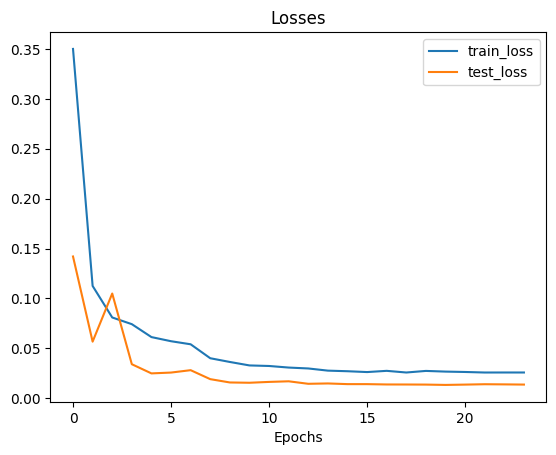

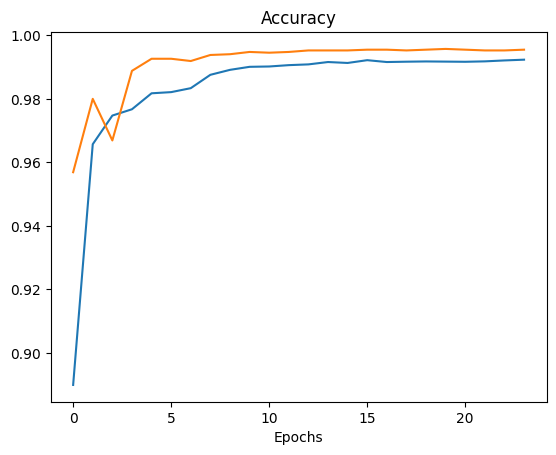

In [ ]:
plot_loss_curves(history_3)

## 6. Generate results

In [ ]:
results = model_3.predict(X_res)
results

875/875 [==============================] - 3s 3ms/step


array([[1.41917476e-11, 7.81538950e-13, 9.99998689e-01, ...,
        1.34005256e-06, 1.45508550e-09, 7.51785856e-11],
       [9.99986172e-01, 5.83976270e-11, 5.25395762e-06, ...,
        1.54071760e-08, 1.26788152e-07, 7.60393459e-06],
       [1.02624810e-11, 3.45335288e-11, 1.13728866e-07, ...,
        2.04552055e-08, 2.12236355e-05, 9.99971390e-01],
       ...,
       [7.86100755e-18, 4.84702001e-10, 4.35821965e-14, ...,
        1.27292179e-13, 1.63657532e-10, 1.00863602e-10],
       [5.89702998e-09, 2.06895479e-09, 2.08607915e-07, ...,
        1.18089236e-04, 1.42088425e-06, 9.99814332e-01],
       [4.89765504e-15, 6.15781687e-15, 1.00000000e+00, ...,
        7.55032303e-09, 6.07718320e-10, 1.55281915e-13]], dtype=float32)

In [ ]:
results = np.argmax(results, axis=1)
results

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
submission = pd.DataFrame({"ImageId": range(1, 28001), "Label": results})
submission.to_csv('digit_recognizer.csv', index=False)

In [ ]:
results

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
### Plot results
import matplotlib.pyplot as plt
import random
import numpy as np

def plot_n_random_images(m=1, n=5):

  """
  Plots n random images with labels as titles
  """

  fig = plt.figure(figsize=(10, 20))

  for i in range(1,(n*m)+1):
    rand_id = random.randint(0, 28000-1)

    img = X_res[rand_id][:, :, 0]
    label = results[rand_id]

    fig.add_subplot(m,n,i)
    plt.imshow(img)
    plt.axis(False)
    plt.title(f"Answer: {label}")

  plt.show()

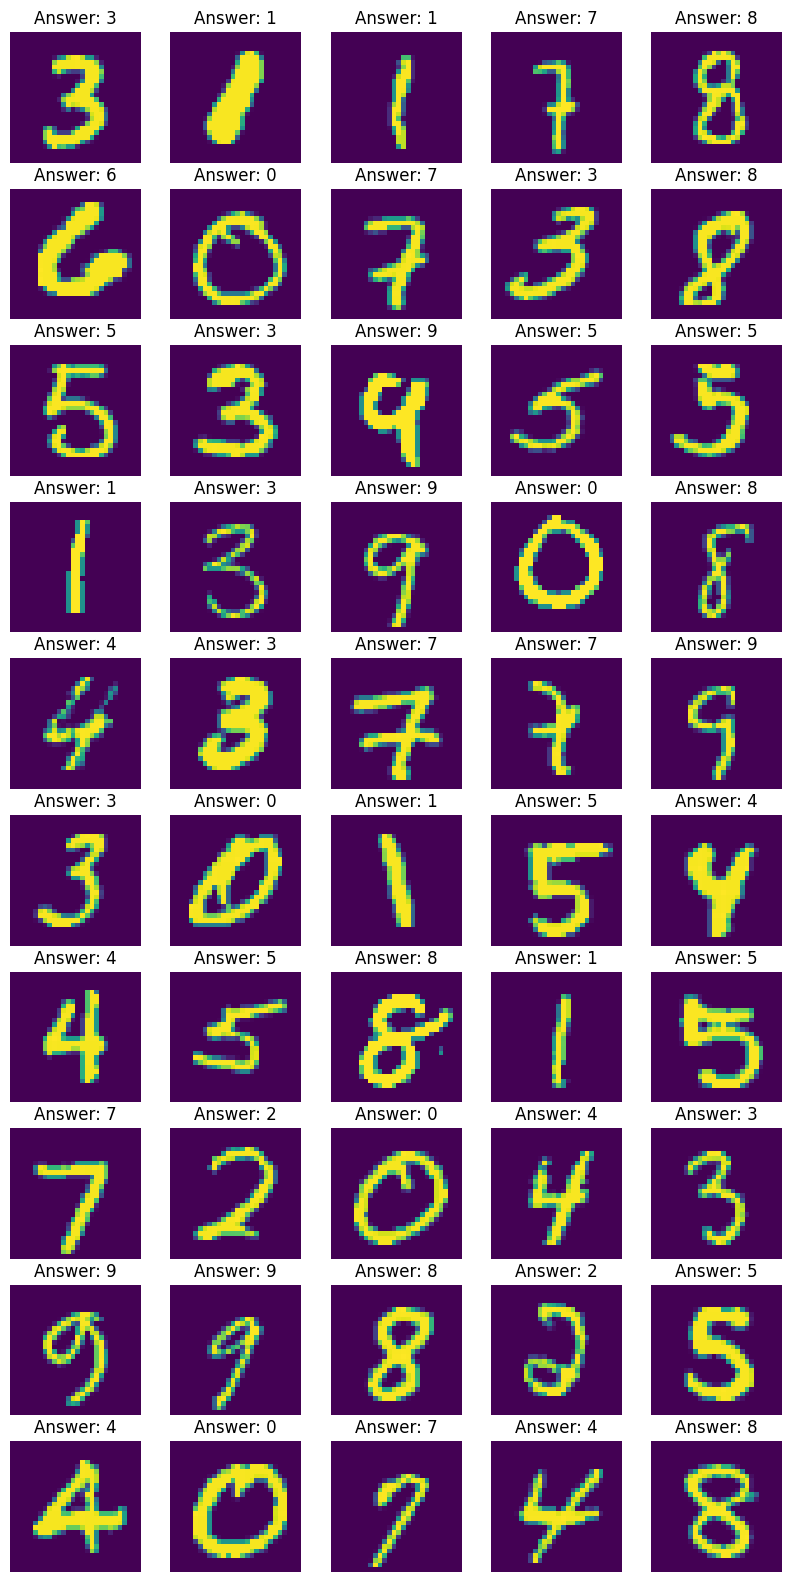

In [ ]:
plot_n_random_images(10,5)